<a href="https://colab.research.google.com/github/RyuuKenshi/Mental-Health/blob/master/Mental_Health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer

# One Hot Encoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

sns.set_palette('Set2')

In [6]:
data = pd.read_csv('https://raw.githubusercontent.com/RyuuKenshi/Mental-Health/master/mental_heath_data_2016.csv')
data.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you know local or online resources to seek help for a mental health disorder?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?","If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?",Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Do you have previous employers?,Have your previous employers provided mental health benefits?,Were you aware of the options for mental health care provided by your previous employers?,Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?,Did your previous employers provide resources to learn more about mental health issues and how to seek help?,Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?,Do you think that discussing a mental health disorder with previous employers would have negative consequences?,Do you think that discussing a physical health issue with previous employers would have negative consequences?,Would you have been willing to discuss a mental health issue with your previous co-workers?,Would you have been willing to discuss a mental health issue with your direct supervisor(s)?,Did you feel that your previous employers took mental health as seriously as physical health?,Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?,Would you be willing to bring up a physical health issue with a potential employer in an interview?,Why or why not?,Would you bring up a mental health issue with a potential employer in an interview?,Why or why not?.1,Do you feel that being identified as a person with a mental health issue would hurt your career?,Do you think that team members/co-workers would view you more negatively if they knew you suffered from a menta

In [ ]:
print('Total questions asked = '+str(data.shape[1]))
print('Questions answered by '+str(data.shape[0])+' people.')

Total questions asked = 63
Questions answered by 1433 people.


## Dealing with missing data

In [ ]:
data.describe()

,Are you self-employed?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,Do you have previous employers?,Have you ever sought treatment for a mental health issue from a mental health professional?,What is your age?
count,1433.000000,1146.000000,263.000000,287.000000,1433.000000,1433.000000,1433.000000
mean,0.200279,0.770506,0.942966,0.644599,0.882066,0.585485,34.286113
std,0.400349,0.420691,0.232350,0.479471,0.322643,0.492810,11.290931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,28.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,323.000000


In [ ]:
data.describe(include=['O'])

,How many employees does your company or organization have?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you feel comfortable discussing a mental health disorder with your coworkers?,...,"If so, what condition(s) were you diagnosed with?","If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
count,1146,1146,1013,1146,1146,1146,1146,1146,1146,1146,...,711,1433,1433,1430,1433,840,1433,851,1433,1433
unique,6,4,3,3,3,3,6,3,3,3,...,116,5,5,70,53,47,53,48,264,3
top,26-100,Yes,No,No,No,I don't know,Somewhat easy,Maybe,No,Maybe,...,"Mood Disorder (Depression, Bipolar Disorder, etc)",Not applicable to me,Often,Male,United States of America,California,United States of America,California,Back-end Developer,Sometimes
freq,292,531,354,813,531,742,281,487,837,479,...,187,557,538,610,840,130,851,141,263,757


In [ ]:
# clearing the ages by replacing the weird ages with the mean age
data.loc[(data['What is your age?'] > 90), 'What is your age?'] = 34
data.loc[(data['What is your age?'] < 10), 'What is your age?'] = 34

In [ ]:
# clearing the genders by grouping the genders into 3 categories: Female, Male, Other
data['What is your gender?'] = data['What is your gender?'].replace([
    'male', 'Male ', 'M', 'm', 'man', 'Cis male',
    'Male.', 'Male (cis)', 'Man', 'Sex is male',
    'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
    'mail', 'M|', 'male ', 'Cis Male', 'Male (trans, FtM)',
    'cisdude', 'cis man', 'MALE'], 'Male')
data['What is your gender?'] = data['What is your gender?'].replace([
    'female', 'I identify as female.', 'female ',
    'Female assigned at birth ', 'F', 'Woman', 'fm', 'f',
    'Cis female', 'Transitioned, M2F', 'Female or Multi-Gender Femme',
    'Female ', 'woman', 'female/woman', 'Cisgender Female', 
    'mtf', 'fem', 'Female (props for making this a freeform field, though)',
    ' Female', 'Cis-woman', 'AFAB', 'Transgender woman',
    'Cis female '], 'Female')
data['What is your gender?'] = data['What is your gender?'].replace([
    'Bigender', 'non-binary,', 'Genderfluid (born female)',
    'Other/Transfeminine', 'Androgynous', 'male 9:1 female, roughly',
    'nb masculine', 'genderqueer', 'Human', 'Genderfluid',
    'Enby', 'genderqueer woman', 'Queer', 'Agender', 'Fluid',
    'Genderflux demi-girl', 'female-bodied; no feelings about gender',
    'non-binary', 'Male/genderqueer', 'Nonbinary', 'Other', 'none of your business',
    'Unicorn', 'human', 'Genderqueer'], 'Other')

In [ ]:
# replace the null gender ones with Male, the mode gender, so we don't have to drop the row
data['What is your gender?'] = data['What is your gender?'].replace(np.NaN, 'Male')
data['What is your gender?'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

## Visualization

### Common Mental Health Disorders

#### Common Mental Health Disorders

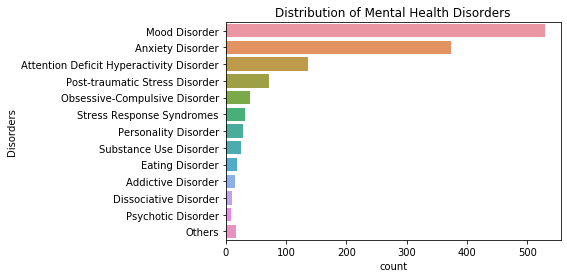

In [ ]:
disorders = {}

disorderCounts = dict(data['If so, what condition(s) were you diagnosed with?'].value_counts())
for i in disorderCounts:
    # get the disorders separately in case someone answered with more than one disorder
    disorderList = i.split('|')
    for j in disorderList:
        j = j.split(' (')[0]
        disorders[j] = disorders.get(j, 0) + disorderCounts[i]

tmp = pd.DataFrame()
for i in disorders:
    tmp = tmp.append([i] * disorders[i])
    
tmp[0] = tmp[0].replace([
    'Autism Spectrum Disorder', 'Autism - while not a "mental illness", still greatly affects how I handle anxiety',
    'autism spectrum disorder', 'PDD-NOS'], 'Autism')
tmp[0] = tmp[0].replace(['Aspergers', 'Asperger Syndrome'], "Asperger's Syndrome")
tmp[0] = tmp[0].replace(['posttraumatic stress disourder'], 'Post-traumatic Stress Disorder')
tmp[0] = tmp[0].replace(['ADD', 'Attention Deficit Disorder', 'attention deficit disorder'],
                       'Attention Deficit Hyperactivity Disorder')
tmp[0] = tmp[0].replace(['Schizotypal Personality Disorder'], 'Personality Disorder')
tmp[0] = tmp[0].replace(['Depression'], 'Mood Disorder')
tmp[0] = tmp[0].replace([
    'Autism', "Asperger's Syndrome", 'Intimate Disorder',
    'Seasonal Affective Disorder', 'Burn out', 'Gender Identity Disorder',
    'Suicidal Ideation', 'Gender Dysphoria', 'MCD'], 'Others')

# print(tmp[0].value_counts())
g = sns.countplot(y=tmp[0], order=[
    'Mood Disorder', 'Anxiety Disorder', 'Attention Deficit Hyperactivity Disorder',
    'Post-traumatic Stress Disorder', 'Obsessive-Compulsive Disorder',
    'Stress Response Syndromes', 'Personality Disorder', 'Substance Use Disorder',
    'Eating Disorder', 'Addictive Disorder', 'Dissociative Disorder', 
    'Psychotic Disorder', 'Others'])
g.set_ylabel('Disorders')
g.set_title('Distribution of Mental Health Disorders')
plt.show()

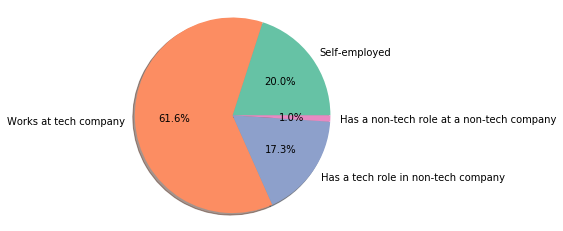

In [ ]:
# pie chart of workers
labels = ['Self-employed', 'Works at tech company', 'Has a tech role in non-tech company', 'Has a non-tech role at a non-tech company']
sizes = [data['Are you self-employed?'].value_counts()[1],
         data['Is your employer primarily a tech company/organization?'].value_counts()[1],
         data['Is your primary role within your company related to tech/IT?'].value_counts()[1],
         data['Is your primary role within your company related to tech/IT?'].value_counts()[0]
        ]
# print(sizes) # adds up to 1433, which is the total number of participants
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

In [ ]:
# to make viewing the graphs easier, shorten the column names
data.rename(columns={'What is your age?': 'Age',
                     'What is your gender?': 'Gender',
                     'Do you currently have a mental health disorder?': 'Has MHD'}, inplace=True)

### Below are charts to show the count of mental health disorder patients based on their sex and age. Age is shown on the x-axis and count on the y-axis.

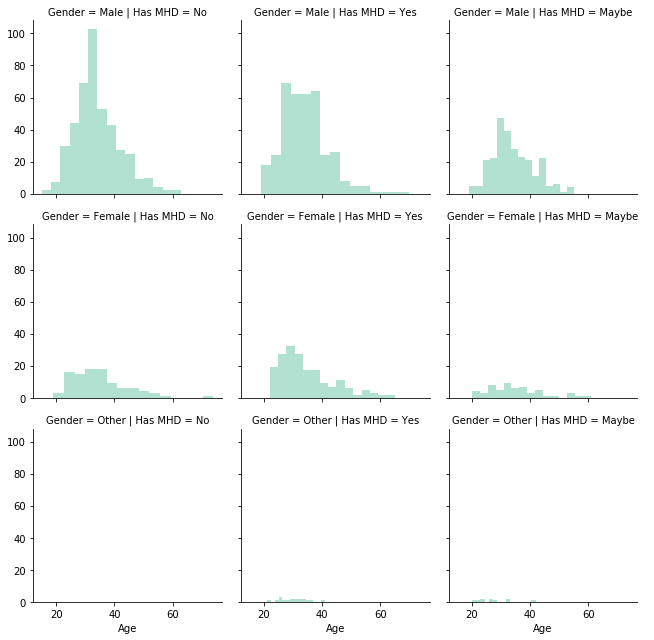

In [ ]:
g = sns.FacetGrid(data, row='Gender', col='Has MHD', height=3)
g.map(plt.hist, 'Age', alpha=0.5, bins=15)
g.add_legend()
plt.show()

### Below we can see how willing people are to come up with their mental health problems

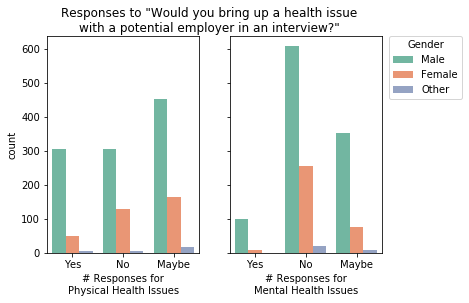

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
fig.suptitle('Responses to "Would you bring up a health issue\nwith a potential employer in an interview?"')
g1 = sns.countplot(x='Would you be willing to bring up a physical health issue with a potential employer in an interview?',
                  hue='Gender', data=data, ax=ax1, order=['Yes', 'No', 'Maybe'])

g2 = sns.countplot(x='Would you bring up a mental health issue with a potential employer in an interview?',
                  hue='Gender', data=data, ax=ax2, order=['Yes', 'No', 'Maybe'])

g1.legend_.remove()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., title='Gender')
g1.set_xlabel('# Responses for\nPhysical Health Issues')
g2.set_xlabel('# Responses for\nMental Health Issues')
g2.set_ylabel('')
plt.show()

### Below we can see how people believe mental health issued are harmful to their careers. From the given data we find that most people do believe that mental health issues does hurt one's career.

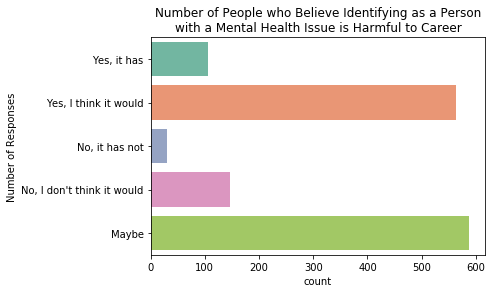

In [ ]:
g = sns.countplot(y='Do you feel that being identified as a person with a mental health issue would hurt your career?',
                  data=data, 
                  order=['Yes, it has', 'Yes, I think it would',
                        'No, it has not', "No, I don't think it would", 'Maybe'])
plt.title('Number of People who Believe Identifying as a Person\nwith a Mental Health Issue is Harmful to Career')
plt.ylabel('Number of Responses')
plt.show()

### It is seen that people believe that Employers providing Mental Health Benefits as Part of Healthcare Coverage create a more positive impact on people and help them to open up to their Employer than those who do not provide Mental Health Benefits.

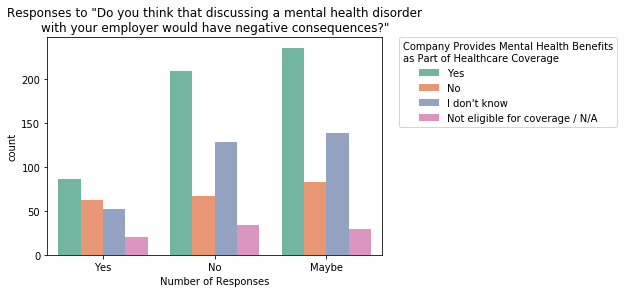

In [ ]:
g = sns.countplot(x='Do you think that discussing a mental health disorder with your employer would have negative consequences?',
                 hue='Does your employer provide mental health benefits as part of healthcare coverage?',
                 data=data, 
                 order=['Yes', 'No', 'Maybe'],
                 hue_order=['Yes', 'No', "I don't know", 'Not eligible for coverage / N/A'])

plt.title('Responses to "Do you think that discussing a mental health disorder\nwith your employer would have negative consequences?"')
plt.xlabel('Number of Responses')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,
         title='Company Provides Mental Health Benefits\nas Part of Healthcare Coverage')
plt.show()

## Machine Learning - Making Predictions
## Predicting outcome of the field "Do you currently have a mental health disorder?"

### Data Preprocessing

In [ ]:
# Removing extra features

extra_feature=['What US state or territory do you work in?','Why or why not?','Why or why not?.1',
               'What US state or territory do you live in?','What country do you live in?',
               'Which of the following best describes your work position?']
data.drop([i for i in extra_feature],axis=1,inplace=True)

In [ ]:
# Removing columns with more than 50% data being Na

features=(list(data))
major_not_ans=[]
for col in features:
    if(sum(pd.isnull(data[col]))>721):
        major_not_ans.append(col)
print('Out of 63 questions asked in survey and answered by 1433 people. '+str(len(major_not_ans))+' questions are there which are not answered by 50% of participants.\nSo those questions are dropped.')

data.drop([i for i in major_not_ans],axis=1,inplace=True)

Out of 63 questions asked in survey and answered by 1433 people. 13 questions are there which are not answered by 50% of participants.
So those questions are dropped.


#### After studying the dataset it seems that this document was not made for self-employed people since most rows answered by self-employed people are empty. Hence removing those rows

In [ ]:
print(len([x for x in data['Are you self-employed?'] if x == 1]))

287


In [ ]:
data.drop(['Are you self-employed?'],axis=1,inplace=True)
data.drop(['Do you have previous employers?'],axis=1,inplace=True)

real_features=(list(data))
print(len(real_features))

42


In [ ]:
# REMOVING SELF EMPLOYED 287 NAN

for index,col in enumerate(real_features):
    idx=data.index[data[col].isnull()]
    if(len(idx)==287):
        k=idx
data.drop(k,inplace=True)
data.shape

(1146, 42)

In [ ]:
# Group of people not answering the same questions So removing them

for index,col in enumerate(real_features):
    idx=data.index[data[col].isnull()]
    if(len(idx)==131):
        k=idx
data.drop(k,inplace=True)
data.shape

(1015, 42)

#### Encoding the categorical data

In [ ]:
# Impute nan with the most frequent value (mode) on every row
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(data)
data = pd.DataFrame(data = imp.transform(data), columns = data.columns)

In [ ]:
for index,val in enumerate(real_features):
    p=data[val].unique()
    print(index,val)
    print(p)
    print('\n')
    #print(response[val].isnull().sum())
    #print("\n")

0 How many employees does your company or organization have?
['26-100' '6-25' 'More than 1000' '100-500' '500-1000' '1-5']


1 Is your employer primarily a tech company/organization?
[1.0 0.0]


2 Does your employer provide mental health benefits as part of healthcare coverage?
['Not eligible for coverage / N/A' 'No' 'Yes' "I don't know"]


3 Do you know the options for mental health care available under your employer-provided coverage?
['No' 'Yes' 'I am not sure']


4 Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?
['No' 'Yes' "I don't know"]


5 Does your employer offer resources to learn more about mental health concerns and options for seeking help?
['No' 'Yes' "I don't know"]


6 Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?
["I don't know" 'Yes' 'No']


7 If a mental health issue prompted you to req

In [ ]:
# Replace name of countries with unique numeric representation

country=(data[real_features[40]].unique())
num_rep=[]    #numeric representation with there index
alp_rep=[]    # name of country
#print(type(country))
for index,val in enumerate(country):
    num_rep.append(index)
    alp_rep.append(val)
print(len(num_rep),len(alp_rep))
data[real_features[40]].replace(alp_rep, num_rep,inplace=True)  # Replacing country name with the index

42 42


In [ ]:
data['Does your employer provide mental health benefits as part of healthcare coverage?'] = data['Does your employer provide mental health benefits as part of healthcare coverage?'].replace('Not eligible for coverage / N/A','No')

data['How many employees does your company or organization have?'] = data['How many employees does your company or organization have?'].replace('1-5', 5)
data['How many employees does your company or organization have?'] = data['How many employees does your company or organization have?'].replace('6-25',25)
data['How many employees does your company or organization have?'] = data['How many employees does your company or organization have?'].replace('26-100', 100)
data['How many employees does your company or organization have?'] = data['How many employees does your company or organization have?'].replace('100-500',500)
data['How many employees does your company or organization have?'] = data['How many employees does your company or organization have?'].replace('500-1000',1000)
data['How many employees does your company or organization have?'] = data['How many employees does your company or organization have?'].replace('More than 1000',5000)

# Replacing NaN values wd range 26-100
data['How many employees does your company or organization have?'] = data['How many employees does your company or organization have?'].replace(np.nan,5)

In [ ]:
numeric = {real_features[2]:     {'No':0, 'Yes':1, "I don't know":2},
                real_features[3]: {'Yes':1, 'I am not sure':2, 'No':0},
                 real_features[4]:{'No':0, 'Yes':1, "I don't know":2},
                  real_features[5]:{'No':0, 'Yes':1, "I don't know":2},
                   real_features[6]:{"I don't know":2, 'Yes':1, 'No':0},
                    real_features[7]:{'Very easy':0 ,'Somewhat easy':1, 'Neither easy nor difficult':2,'Very difficult':-1,
 'Somewhat difficult':-2, "I don't know":2}, #### MODIFIED DIRECTLY
                real_features[8]:{'No':0, 'Maybe':2, 'Yes':1},
                real_features[9]:{'No':0, 'Maybe':2, 'Yes':1},
                 real_features[10]:{'No':0, 'Maybe':2, 'Yes':1},
                 real_features[11]:{'No':0, 'Maybe':2, 'Yes':1},
                 real_features[12]:{"I don't know":2, 'Yes':1, 'No':0},
                 real_features[13]:{'No':0, 'Yes':1},
                 real_features[14]:{'No, none did':0, 'Yes, they all did':1, "I don't know":2, 'Some did':3},
                 real_features[15]:{'N/A (not currently aware)':0, 'I was aware of some':1,
 'Yes, I was aware of all of them':1, 'No, I only became aware later':0},  ### MODIFIED DIRECTLY
                real_features[16]:{"I don't know":2, 'None did':0, 'Some did':3,'Yes, they all did':1},
                real_features[17]:{'None did':0, 'Some did':3, 'Yes, they all did':1},
                real_features[18]:{"I don't know":2, 'Yes, always':1, 'Sometimes':3, 'No':0},
                real_features[19]:{'Some of them':3, 'None of them':0, "I don't know":2, 'Yes, all of them':1},
                real_features[20]:{'None of them':0, 'Some of them':3, 'Yes, all of them':1},
                real_features[21]:{'Some of my previous employers':3, 'No, at none of my previous employers':0,
 'Yes, at all of my previous employers':1},
                real_features[22]:{'Some of my previous employers':3, "I don't know":2, 'No, at none of my previous employers':0,
 'Yes, at all of my previous employers':1},
                real_features[23]:{"I don't know":2, 'Some did':3, 'None did':0, 'Yes, they all did':1},
                real_features[24]:{'None of them':0, 'Some of them':3, 'Yes, all of them':1},
                real_features[25]:{'Maybe':2, 'Yes':1, 'No':0},
                real_features[26]:{'Maybe':2, 'Yes':1, 'No':0},
                real_features[27]:{'Maybe':2, "No, I don't think it would":0, 'Yes, I think it would':1,
 'No, it has not':0, 'Yes, it has':1},  ### MODIFIED DIRECTLY
                real_features[28]:{"No, I don't think they would":0, 'Maybe':2, 'Yes, they do':1,'Yes, I think they would':1, 'No, they do not':0},  ## MODIFIED DIRECTLY
                real_features[29]:{'Somewhat open':1, 'Not applicable to me (I do not have a mental illness)':4,
 'Very open':2, 'Not open at all':-2 ,'Neutral':0, 'Somewhat not open':-1}, ### MODIFIED DIRECTLY
                real_features[30]:{'No':0, 'Maybe/Not sure':2, 'Yes, I experienced':1, 'Yes, I observed':1},
                real_features[31]:{'No':0, 'Yes':1, "I don't know":2},
                real_features[32]:{'Yes':1, 'Maybe':2, 'No':0},
                real_features[33]:{'Yes':1, 'Maybe':2, 'No':0},
                real_features[34]:{'Yes':1, 'No':0},
                real_features[36]:{'Not applicable to me':4, 'Rarely':0, 'Sometimes':3, 'Never':0, 'Often':1},
                real_features[37]:{'Not applicable to me':4, 'Sometimes':3, 'Often':1, 'Rarely':0, 'Never':0},
                real_features[39]:{'Male':1, 'Female':0, 'Other':2},
                real_features[41]:{'Sometimes':3, 'Never':0, 'Always':1}
          }

In [ ]:
data.replace(numeric, inplace=True)
data.head()

,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",Do you think that discussing a mental health disorder with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,...,Have you had a mental health disorder in the past?,Has MHD,Have you been diagnosed with a mental health condition by a medical professional?,Have you ever sought treatment for a mental health issue from a mental health professional?,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",Age,Gender,What country do you work in?,Do you work remotely?
0,100,1,0,0,0,0,2,0,0,0,...,1,0,1,0,4,4,39,1,0,3
1,25,1,0,1,1,1,1,1,0,0,...,1,1,1,1,0,3,29,1,1,0
2,25,1,0,0,0,0,2,2,2,0,...,2,0,0,1,4,4,38,1,0,1
3,25,0,1,1,0,0,0,2,1,2,...,1,1,1,1,3,3,43,0,1,3
4,5000,1,1,2,0,1,1,1,1,1,...,0,1,0,1,4,1,42,1,0,3


### Random Forest Classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [ ]:
target=data['Has MHD']
X=data
X.drop(['Has MHD'],axis=1,inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,target, test_size=0.2, random_state=0)

In [ ]:
clf = RandomForestClassifier(max_depth=15, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
print(clf.score(X_test,y_test))

0.7093596059113301
